• Train file is for training the model and for model evaluation and test file
is only for making predictions. Test file will not be having the output
column.
• You must do pre-processing separately on the train and test dataset.
Do not combine them.
• Do the following steps
o Exploratory Data Analysis
o Pre-processing
o Modelling
o Fine tuning
o Do not remove rows from dataset
• Once you get the best model, upload the sample submission file to
python.
• Replace the ‘Loan_Status’ column with the prediction values you get
using the test dataset for your best model.
• Save this new dataset as a csv file (search for the code in internet)
• Upload this dataset in the Solution Checker in Analytics Vidhya and also
add a description and click on add solution.
• You can upload multiple csv files created using different models to
Analytics Vidhya and check if your score is improving.
• Once you get the best score, go to the My Submissions tab and take a
screenshot of it.
• Also upload your code to GitHub.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data= pd.read_csv('/content/train_ctrUa4K.csv')
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
train_data.shape

(614, 13)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
train_data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [9]:
train_data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

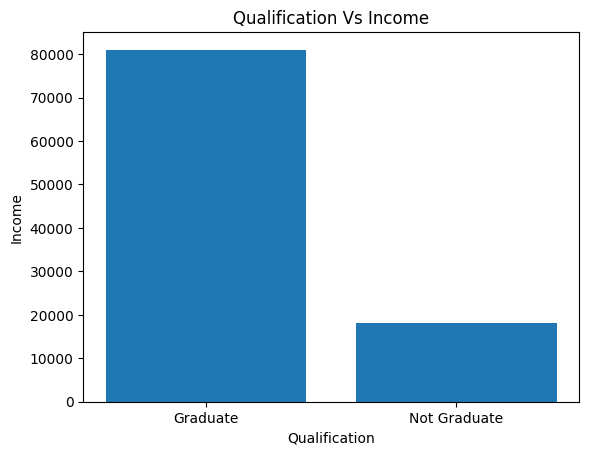

In [10]:
plt.bar(train_data['Education'],train_data['ApplicantIncome'])
plt.title('Qualification Vs Income')
plt.xlabel('Qualification')
plt.ylabel('Income')
plt.show()

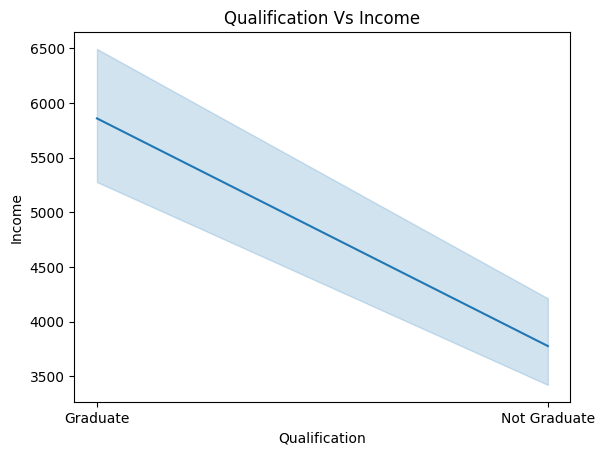

In [11]:
sns.lineplot(data=train_data,x='Education' , y='ApplicantIncome')
plt.title('Qualification Vs Income')
plt.xlabel('Qualification')
plt.ylabel('Income')
plt.show()

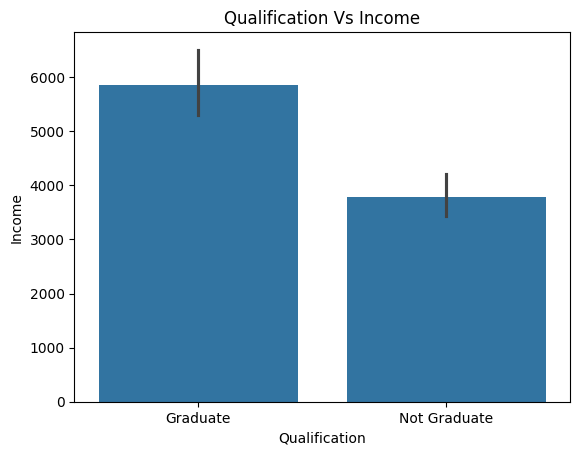

In [12]:
sns.barplot(data=train_data,x='Education' , y='ApplicantIncome')
plt.title('Qualification Vs Income')
plt.xlabel('Qualification')
plt.ylabel('Income')
plt.show()

<Axes: xlabel='Education', ylabel='ApplicantIncome'>

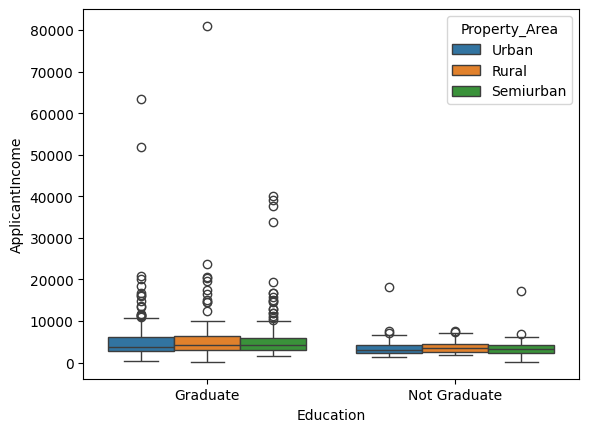

In [13]:
sns.boxplot(data=train_data, x='Education' , y='ApplicantIncome', hue='Property_Area')

<function matplotlib.pyplot.show(close=None, block=None)>

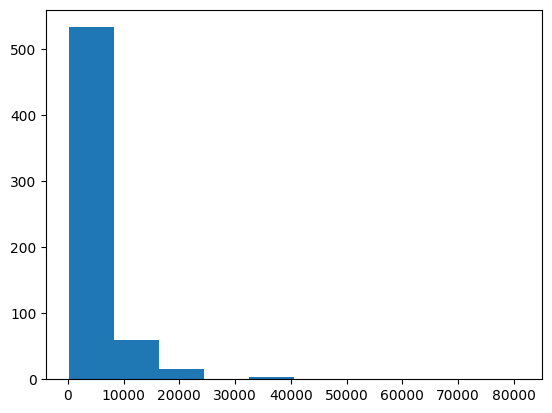

In [14]:
# Histogram of GDP Per capita in 2007
plt.hist(train_data['ApplicantIncome'])
plt.show

In [15]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

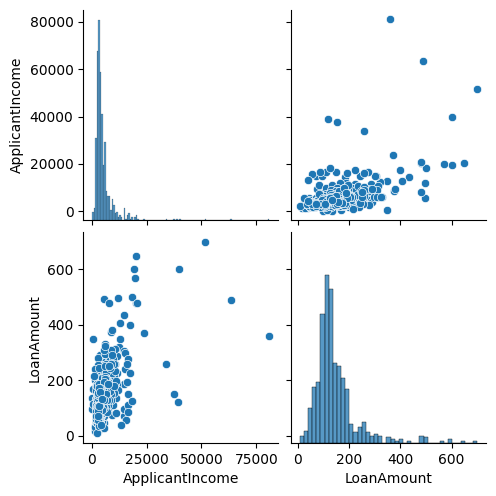

In [16]:
# Pairwise correlation plot
sns.pairplot(train_data[['Gender','Education','ApplicantIncome','LoanAmount']])

Preprocessing

In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [18]:
train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>],
       [<Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Loan_Amount_Term'}>],
       [<Axes: title={'center': 'Credit_History'}>, <Axes: >]],
      dtype=object)

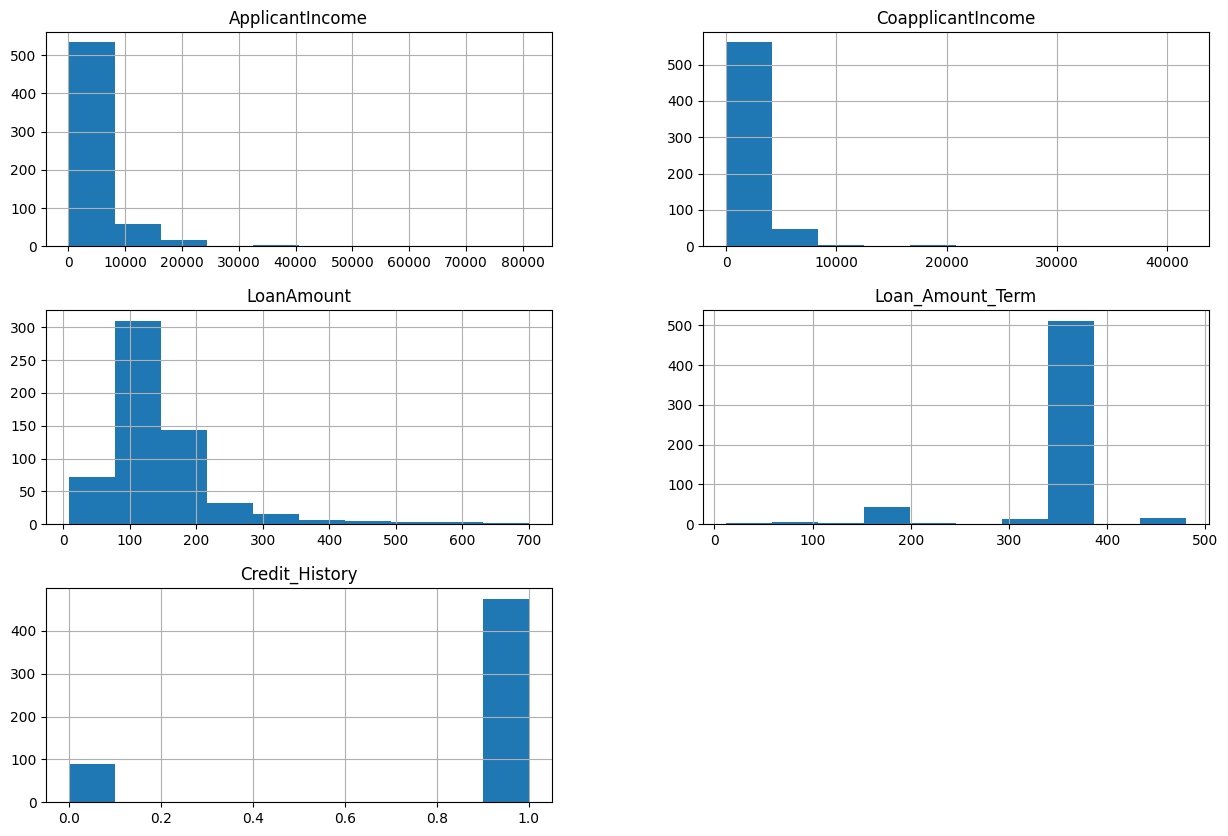

In [19]:
freqgraph = train_data.select_dtypes(['float64','int64'])
freqgraph.hist(figsize=(15,10))

In [20]:
train_data['Gender'] = train_data['Gender'].fillna(train_data['Gender'].mode()[0])
train_data['Married'] = train_data['Married'].fillna(train_data['Married'].mode()[0])
train_data['Dependents'] = train_data['Dependents'].fillna(train_data['Dependents'].mode()[0])
train_data['Self_Employed'] = train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0])
train_data['LoanAmount'] = train_data['LoanAmount'].fillna(train_data['LoanAmount'].median())
train_data['Loan_Amount_Term'] = train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].median())
train_data['Credit_History'] = train_data['Credit_History'].fillna(train_data['Credit_History'].median())

In [21]:
train_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

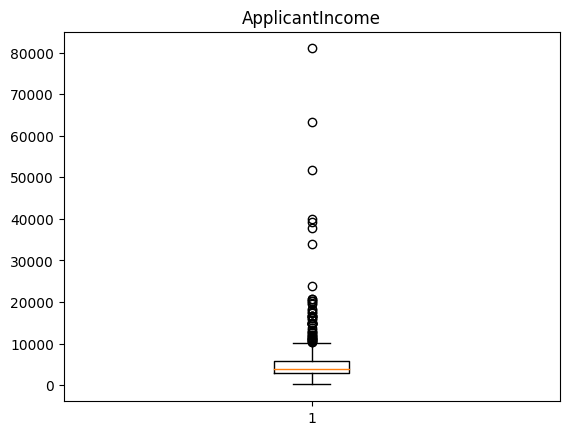

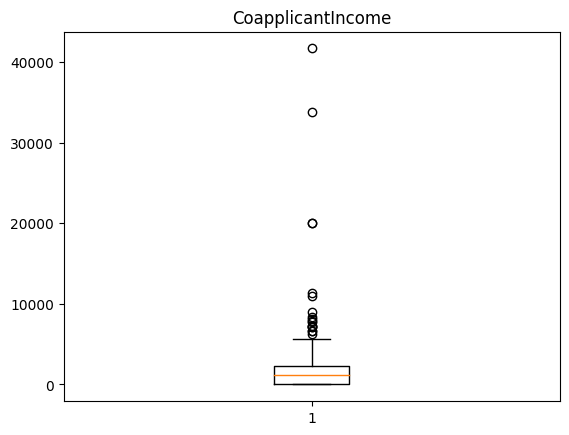

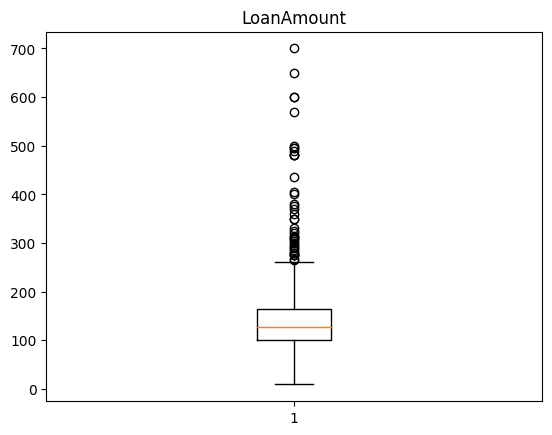

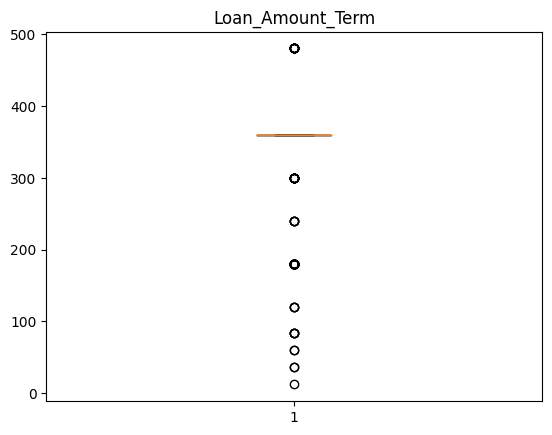

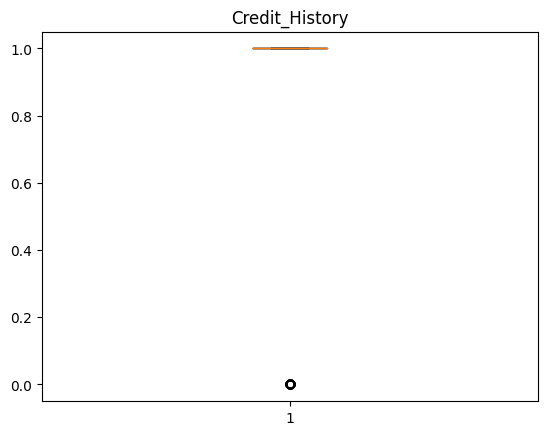

In [22]:
numerical_col = [ 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

for i in numerical_col:
  plt.figure()
  plt.boxplot(train_data[i])
  plt.title(i)
  plt.show()

In [23]:
# colunm -'ApplicantIncome'
Q1 = train_data['ApplicantIncome'].quantile(0.25)
Q2 = train_data['ApplicantIncome'].quantile(0.50)
Q3 = train_data['ApplicantIncome'].quantile(0.75)

print("Q1 is: ",Q1)
print("Q2 is: ",Q2)
print("Q2 is: ",Q2)

IQR = Q3-Q1

print(IQR)
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR

print("lower whisker: ",lower_lim)
print("upper whisker: ",upper_lim)

outlier =[]
for x in train_data['ApplicantIncome']:
  if((x<lower_lim) or (x>upper_lim)):
    outlier.append(x)

print(outlier)

Q1 is:  2877.5
Q2 is:  3812.5
Q2 is:  3812.5
2917.5
lower whisker:  -1498.75
upper whisker:  10171.25
[12841, 12500, 11500, 10750, 13650, 11417, 14583, 10408, 23803, 10513, 20166, 14999, 11757, 14866, 39999, 51763, 33846, 39147, 12000, 11000, 16250, 14683, 11146, 14583, 20667, 20233, 15000, 63337, 19730, 15759, 81000, 14880, 12876, 10416, 37719, 16692, 16525, 16667, 10833, 18333, 17263, 20833, 13262, 17500, 11250, 18165, 19484, 16666, 16120, 12000]


In [24]:
train_data['ApplicantIncome'] = train_data['ApplicantIncome'].clip(lower=lower_lim, upper=upper_lim)

In [25]:
outlier =[]
for x in train_data['ApplicantIncome']:
  if((x<lower_lim) or (x>upper_lim)):
    outlier.append(x)

print(outlier)

[]


In [26]:
# colunm -'CoapplicantIncome'
Q1 = train_data['CoapplicantIncome'].quantile(0.25)
Q2 = train_data['CoapplicantIncome'].quantile(0.50)
Q3 = train_data['CoapplicantIncome'].quantile(0.75)

print("Q1 is: ",Q1)
print("Q2 is: ",Q2)
print("Q2 is: ",Q2)

IQR = Q3-Q1

print(IQR)
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR

print("lower whisker: ",lower_lim)
print("upper whisker: ",upper_lim)

outlier =[]
for x in train_data['CoapplicantIncome']:
  if((x<lower_lim) or (x>upper_lim)):
    outlier.append(x)

print(outlier)

Q1 is:  0.0
Q2 is:  1188.5
Q2 is:  1188.5
2297.25
lower whisker:  -3445.875
upper whisker:  5743.125
[10968.0, 8106.0, 7210.0, 8980.0, 7750.0, 11300.0, 7250.0, 7101.0, 6250.0, 7873.0, 20000.0, 20000.0, 8333.0, 6667.0, 6666.0, 7166.0, 33837.0, 41667.0]


In [27]:
train_data['CoapplicantIncome'] = train_data['CoapplicantIncome'].clip(lower=lower_lim, upper=upper_lim)

In [28]:

outlier =[]
for x in train_data['CoapplicantIncome']:
  if((x<lower_lim) or (x>upper_lim)):
    outlier.append(x)

print(outlier)

[]


In [29]:
# colunm -'LoanAmount'
Q1 = train_data['LoanAmount'].quantile(0.25)
Q2 = train_data['LoanAmount'].quantile(0.50)
Q3 = train_data['LoanAmount'].quantile(0.75)

print("Q1 is: ",Q1)
print("Q2 is: ",Q2)
print("Q2 is: ",Q2)

IQR = Q3-Q1

print(IQR)
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR

print("lower whisker: ",lower_lim)
print("upper whisker: ",upper_lim)

outlier =[]
for x in train_data['LoanAmount']:
  if((x<lower_lim) or (x>upper_lim)):
    outlier.append(x)

print(outlier)

Q1 is:  100.25
Q2 is:  128.0
Q2 is:  128.0
64.5
lower whisker:  3.5
upper whisker:  261.5
[267.0, 349.0, 315.0, 320.0, 286.0, 312.0, 265.0, 370.0, 650.0, 290.0, 600.0, 275.0, 700.0, 495.0, 280.0, 279.0, 304.0, 330.0, 436.0, 480.0, 300.0, 376.0, 490.0, 308.0, 570.0, 380.0, 296.0, 275.0, 360.0, 405.0, 500.0, 480.0, 311.0, 480.0, 400.0, 324.0, 600.0, 275.0, 292.0, 350.0, 496.0]


In [30]:
train_data['LoanAmount'] = train_data['LoanAmount'].clip(lower=lower_lim, upper=upper_lim)

In [31]:
outlier =[]
for x in train_data['LoanAmount']:
  if((x<lower_lim) or (x>upper_lim)):
    outlier.append(x)

print(outlier)

[]


In [32]:
# colunm -'Loan_Amount_Term'
Q1 = train_data['Loan_Amount_Term'].quantile(0.25)
Q2 = train_data['Loan_Amount_Term'].quantile(0.50)
Q3 = train_data['Loan_Amount_Term'].quantile(0.75)

print("Q1 is: ",Q1)
print("Q2 is: ",Q2)
print("Q2 is: ",Q2)

IQR = Q3-Q1

print(IQR)
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR

print("lower whisker: ",lower_lim)
print("upper whisker: ",upper_lim)

outlier =[]
for x in train_data['Loan_Amount_Term']:
  if((x<lower_lim) or (x>upper_lim)):
    outlier.append(x)

print(outlier)

Q1 is:  360.0
Q2 is:  360.0
Q2 is:  360.0
0.0
lower whisker:  360.0
upper whisker:  360.0
[120.0, 240.0, 180.0, 180.0, 60.0, 300.0, 480.0, 300.0, 240.0, 180.0, 120.0, 180.0, 180.0, 480.0, 180.0, 180.0, 480.0, 120.0, 180.0, 180.0, 180.0, 180.0, 480.0, 300.0, 180.0, 480.0, 180.0, 300.0, 180.0, 180.0, 480.0, 180.0, 180.0, 60.0, 180.0, 180.0, 480.0, 180.0, 36.0, 180.0, 300.0, 480.0, 480.0, 84.0, 180.0, 180.0, 180.0, 180.0, 480.0, 300.0, 480.0, 300.0, 180.0, 180.0, 480.0, 180.0, 180.0, 180.0, 300.0, 300.0, 180.0, 240.0, 300.0, 300.0, 180.0, 180.0, 180.0, 180.0, 300.0, 84.0, 12.0, 480.0, 300.0, 180.0, 480.0, 180.0, 180.0, 36.0, 180.0, 480.0, 84.0, 84.0, 180.0, 240.0, 180.0, 180.0, 180.0, 180.0]


In [33]:
train_data['Loan_Amount_Term'] = train_data['Loan_Amount_Term'].clip(lower=lower_lim, upper=upper_lim)

In [34]:
outlier =[]
for x in train_data['Loan_Amount_Term']:
  if((x<lower_lim) or (x>upper_lim)):
    outlier.append(x)

print(outlier)

[]


In [35]:
'Credit_History'

'Credit_History'

In [36]:
# colunm -'Credit_History'
Q1 = train_data['Credit_History'].quantile(0.25)
Q2 = train_data['Credit_History'].quantile(0.50)
Q3 = train_data['Credit_History'].quantile(0.75)

print("Q1 is: ",Q1)
print("Q2 is: ",Q2)
print("Q2 is: ",Q2)

IQR = Q3-Q1

print(IQR)
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR

print("lower whisker: ",lower_lim)
print("upper whisker: ",upper_lim)

outlier =[]
for x in train_data['Credit_History']:
  if((x<lower_lim) or (x>upper_lim)):
    outlier.append(x)

print(outlier)

Q1 is:  1.0
Q2 is:  1.0
Q2 is:  1.0
0.0
lower whisker:  1.0
upper whisker:  1.0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [37]:
train_data['Credit_History'] = train_data['Credit_History'].clip(lower=lower_lim, upper=upper_lim)

In [38]:
outlier =[]
for x in train_data['Credit_History']:
  if((x<lower_lim) or (x>upper_lim)):
    outlier.append(x)

print(outlier)

[]


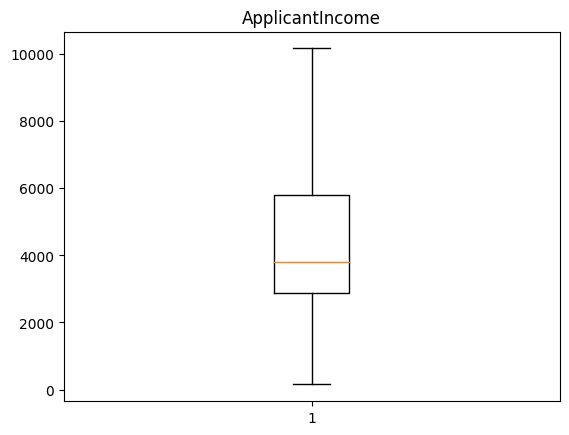

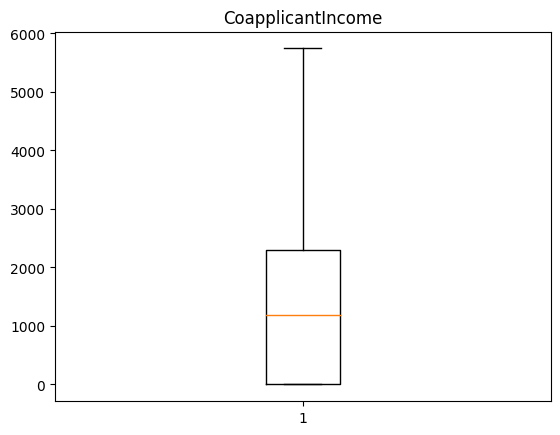

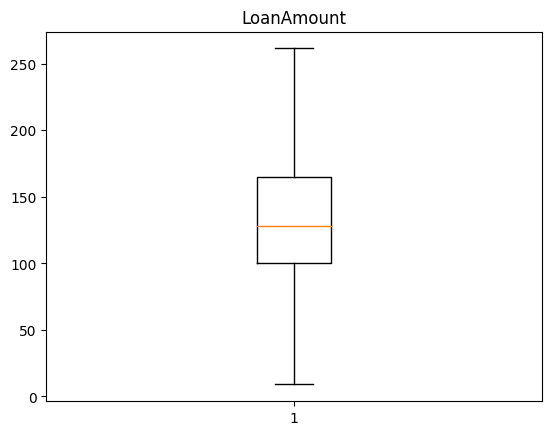

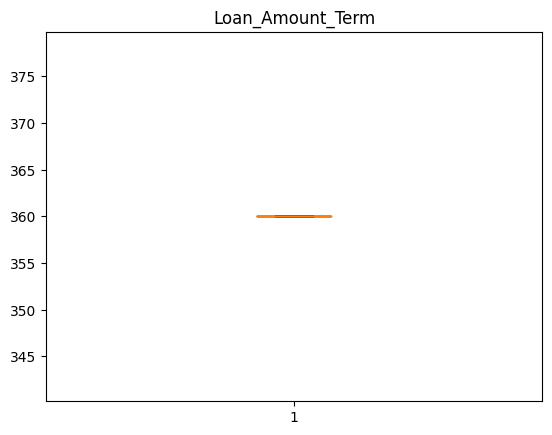

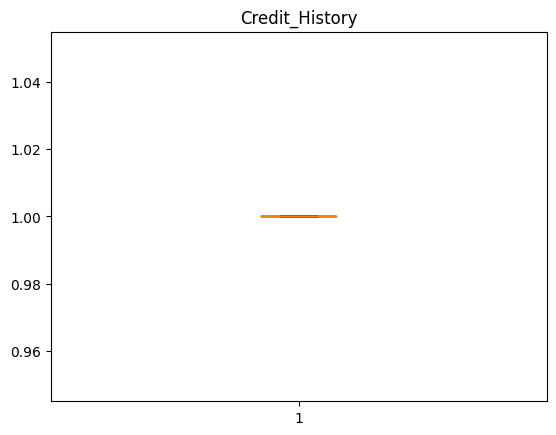

In [39]:
numerical_col = [ 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

for i in numerical_col:
  plt.figure()
  plt.boxplot(train_data[i])
  plt.title(i)
  plt.show()

Encoding

In [40]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [41]:
train_data['Loan_ID'].unique()

array(['LP001002', 'LP001003', 'LP001005', 'LP001006', 'LP001008',
       'LP001011', 'LP001013', 'LP001014', 'LP001018', 'LP001020',
       'LP001024', 'LP001027', 'LP001028', 'LP001029', 'LP001030',
       'LP001032', 'LP001034', 'LP001036', 'LP001038', 'LP001041',
       'LP001043', 'LP001046', 'LP001047', 'LP001050', 'LP001052',
       'LP001066', 'LP001068', 'LP001073', 'LP001086', 'LP001087',
       'LP001091', 'LP001095', 'LP001097', 'LP001098', 'LP001100',
       'LP001106', 'LP001109', 'LP001112', 'LP001114', 'LP001116',
       'LP001119', 'LP001120', 'LP001123', 'LP001131', 'LP001136',
       'LP001137', 'LP001138', 'LP001144', 'LP001146', 'LP001151',
       'LP001155', 'LP001157', 'LP001164', 'LP001179', 'LP001186',
       'LP001194', 'LP001195', 'LP001197', 'LP001198', 'LP001199',
       'LP001205', 'LP001206', 'LP001207', 'LP001213', 'LP001222',
       'LP001225', 'LP001228', 'LP001233', 'LP001238', 'LP001241',
       'LP001243', 'LP001245', 'LP001248', 'LP001250', 'LP0012

In [42]:
train_data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [43]:
train_data['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [44]:
train_data['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [45]:
train_data['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [46]:
train_data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

Label Encoding

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
obj_data = train_data.select_dtypes(include = 'object')
le = LabelEncoder()
for i in obj_data:
   train_data[i] = le.fit_transform(train_data[i])

In [49]:
obj_data =train_data.select_dtypes(include="object").columns

obj_data = obj_data.difference(['Loan_ID'], sort=False)

In [50]:
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106.0,0.0,40.0,360.0,1.0,0,1
611,611,1,1,1,0,0,8072.0,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583.0,0.0,187.0,360.0,1.0,2,1


In [51]:
#train_data.set_index('Loan_ID',inplace=True)

In [52]:
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106.0,0.0,40.0,360.0,1.0,0,1
611,611,1,1,1,0,0,8072.0,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583.0,0.0,187.0,360.0,1.0,2,1


In [53]:
train_data = pd.get_dummies(train_data)

In [54]:
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106.0,0.0,40.0,360.0,1.0,0,1
611,611,1,1,1,0,0,8072.0,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583.0,0.0,187.0,360.0,1.0,2,1


In [55]:
train_data.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.0,614.0,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,4617.111564,1419.702231,137.365635,360.0,1.0,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,2479.851729,1624.605892,55.779749,0.0,0.0,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,360.0,1.0,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.0,1.0,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.0,1.0,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.0,1.0,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,10171.250000,5743.125000,261.500000,360.0,1.0,2.000000,1.000000


In [56]:
#Standardized Scaling
from sklearn.preprocessing import StandardScaler

x = train_data.drop(['Gender', 'Married', 'Dependents','Self_Employed', 'Education', 'Loan_Amount_Term', 'Credit_History','Credit_History','Loan_Status'], axis = 1)
sc = StandardScaler()
x_sc = sc.fit_transform(x)
x_sc = pd.DataFrame(x_sc)

In [57]:
x

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area
0,0,5849.0,0.0,128.0,2
1,1,4583.0,1508.0,128.0,0
2,2,3000.0,0.0,66.0,2
3,3,2583.0,2358.0,120.0,2
4,4,6000.0,0.0,141.0,2
...,...,...,...,...,...
609,609,2900.0,0.0,71.0,0
610,610,4106.0,0.0,40.0,0
611,611,8072.0,240.0,253.0,2
612,612,7583.0,0.0,187.0,2


In [58]:
x_sc.describe()

,0,1,2,3,4
count,614.000000,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02
mean,0.000000,1.764784e-16,9.257886e-17,1.012581e-16,-5.786179e-17
std,1.000815,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00
min,-1.729232,-1.802831e+00,-8.745873e-01,-2.303171e+00,-1.318513e+00
25%,-0.864616,-7.020702e-01,-8.745873e-01,-6.659388e-01,-1.318513e+00
50%,0.000000,-3.247241e-01,-1.424288e-01,-1.680408e-01,-4.760721e-02
75%,0.864616,4.753707e-01,5.406008e-01,4.913377e-01,1.223298e+00
max,1.729232,2.241532e+00,2.663383e+00,2.227252e+00,1.223298e+00


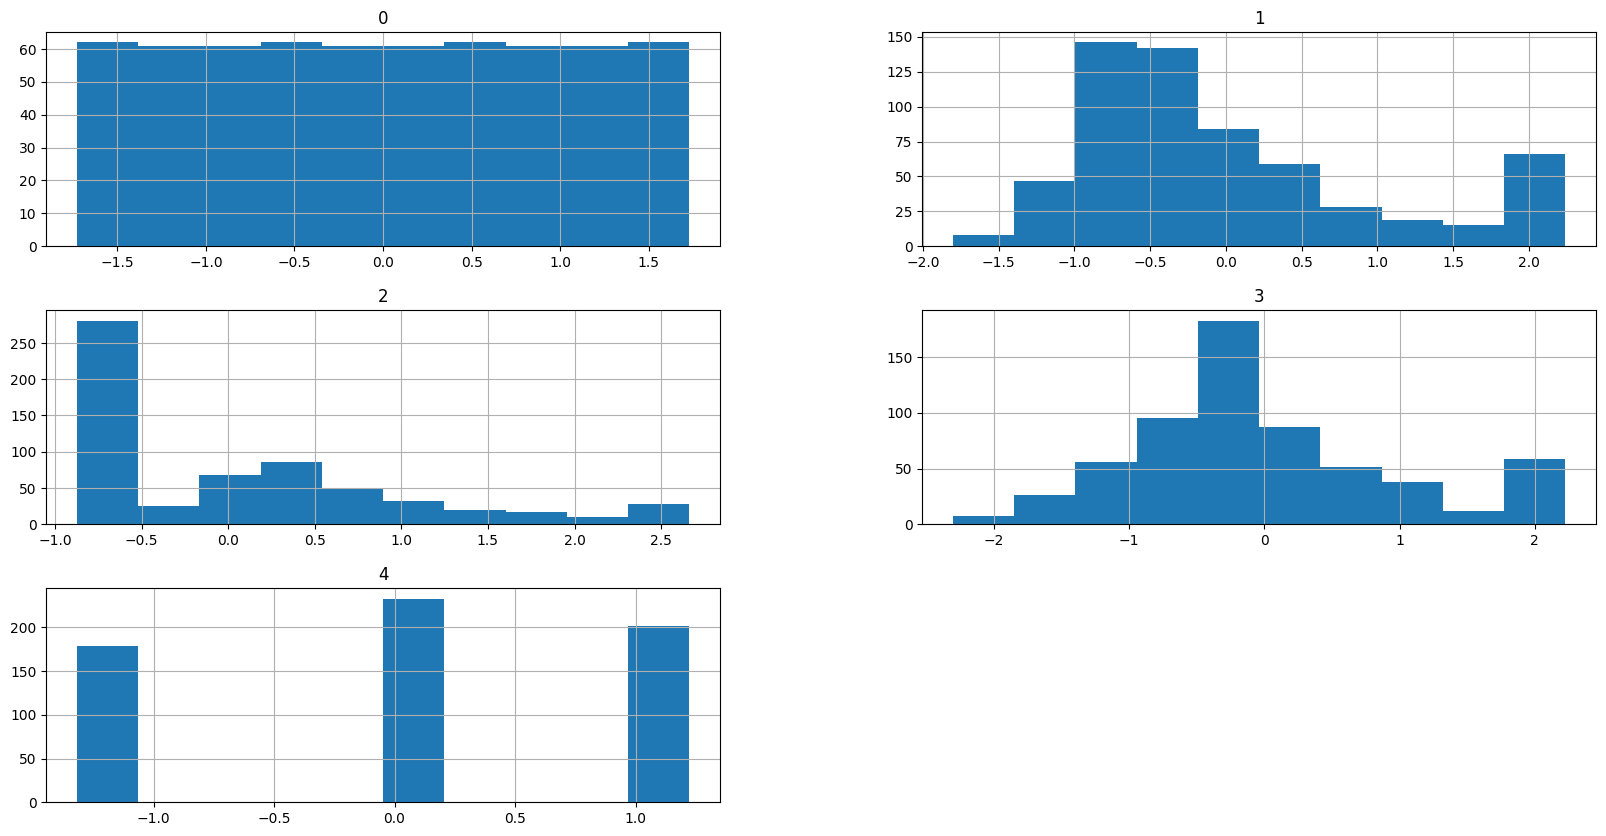

In [59]:
x_sc.hist(figsize = (20,10))
plt.show()

min-max scaling

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
x_sc.describe()

,0,1,2,3,4
count,614.000000,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02
mean,0.000000,1.764784e-16,9.257886e-17,1.012581e-16,-5.786179e-17
std,1.000815,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00
min,-1.729232,-1.802831e+00,-8.745873e-01,-2.303171e+00,-1.318513e+00
25%,-0.864616,-7.020702e-01,-8.745873e-01,-6.659388e-01,-1.318513e+00
50%,0.000000,-3.247241e-01,-1.424288e-01,-1.680408e-01,-4.760721e-02
75%,0.864616,4.753707e-01,5.406008e-01,4.913377e-01,1.223298e+00
max,1.729232,2.241532e+00,2.663383e+00,2.227252e+00,1.223298e+00


In [62]:
#MInMax Scaling

minmax =MinMaxScaler()
x_minmax = minmax.fit_transform(x)
x_minmax = pd.DataFrame(x_minmax)

In [63]:
x_minmax

,0,1,2,3,4
0,0.000000,0.568692,0.000000,0.471287,1.0
1,0.001631,0.442360,0.262575,0.471287,0.0
2,0.003263,0.284396,0.000000,0.225743,1.0
3,0.004894,0.242784,0.410578,0.439604,1.0
4,0.006525,0.583760,0.000000,0.522772,1.0
...,...,...,...,...,...
609,0.993475,0.274417,0.000000,0.245545,0.0
610,0.995106,0.394761,0.000000,0.122772,0.0
611,0.996737,0.790520,0.041789,0.966337,1.0
612,0.998369,0.741724,0.000000,0.704950,1.0


In [64]:
x_minmax.describe()

,0,1,2,3,4
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.500000,0.445764,0.247200,0.508379,0.518730
std,0.289381,0.247459,0.282878,0.220910,0.393741
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.272172,0.000000,0.361386,0.000000
50%,0.500000,0.365473,0.206943,0.471287,0.500000
75%,0.750000,0.563303,0.400000,0.616832,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


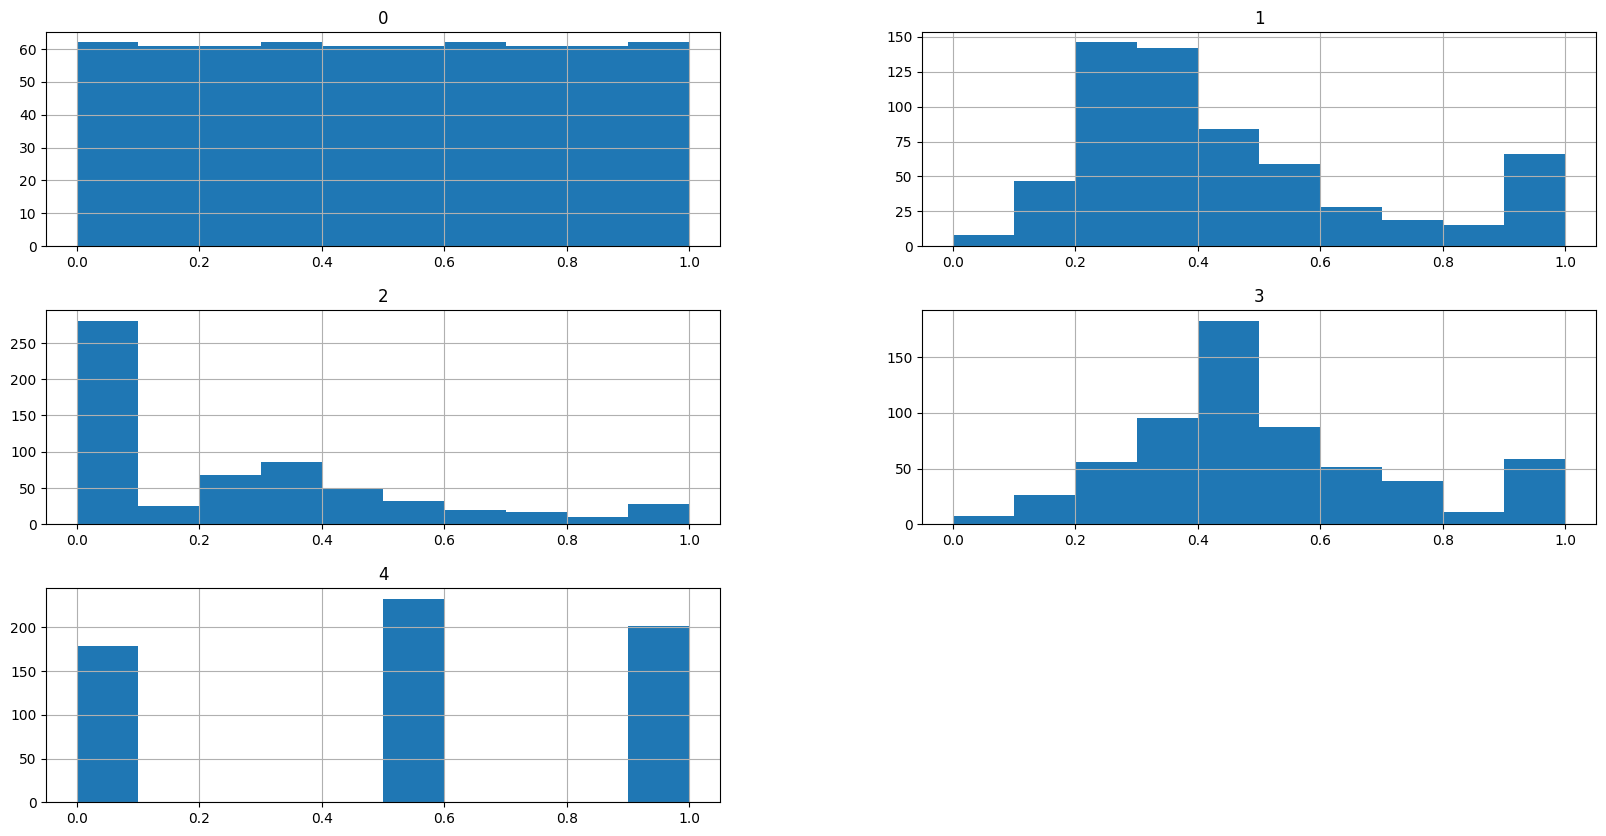

In [65]:
x_minmax.hist(figsize = (20,10))
plt.show()

Normalization

In [66]:
from sklearn.preprocessing import normalize

In [67]:
x_norm = normalize(x)
x_norm = pd.DataFrame(x_norm)
x_norm

,0,1,2,3,4
0,0.000000,0.999761,0.000000,0.021879,0.000342
1,0.000207,0.949565,0.312447,0.026521,0.000000
2,0.000667,0.999758,0.000000,0.021995,0.000667
3,0.000857,0.738106,0.673811,0.034291,0.000572
4,0.000666,0.999724,0.000000,0.023494,0.000333
...,...,...,...,...,...
609,0.205458,0.978373,0.000000,0.023953,0.000000
610,0.146943,0.989098,0.000000,0.009636,0.000000
611,0.075408,0.996224,0.029620,0.031225,0.000247
612,0.080421,0.996458,0.000000,0.024573,0.000263


In [68]:
x_norm.describe()

,0,1,2,3,4
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.070376,0.878695,0.305962,0.028487,0.000247
std,0.051613,0.164927,0.314274,0.009744,0.000233
min,0.000000,0.070865,0.000000,0.003681,0.000000
25%,0.027916,0.801187,0.000000,0.022663,0.000000
50%,0.059353,0.962749,0.253633,0.027940,0.000217
75%,0.103338,0.997871,0.589400,0.033832,0.000369
max,0.296049,0.999936,0.991005,0.082152,0.001386


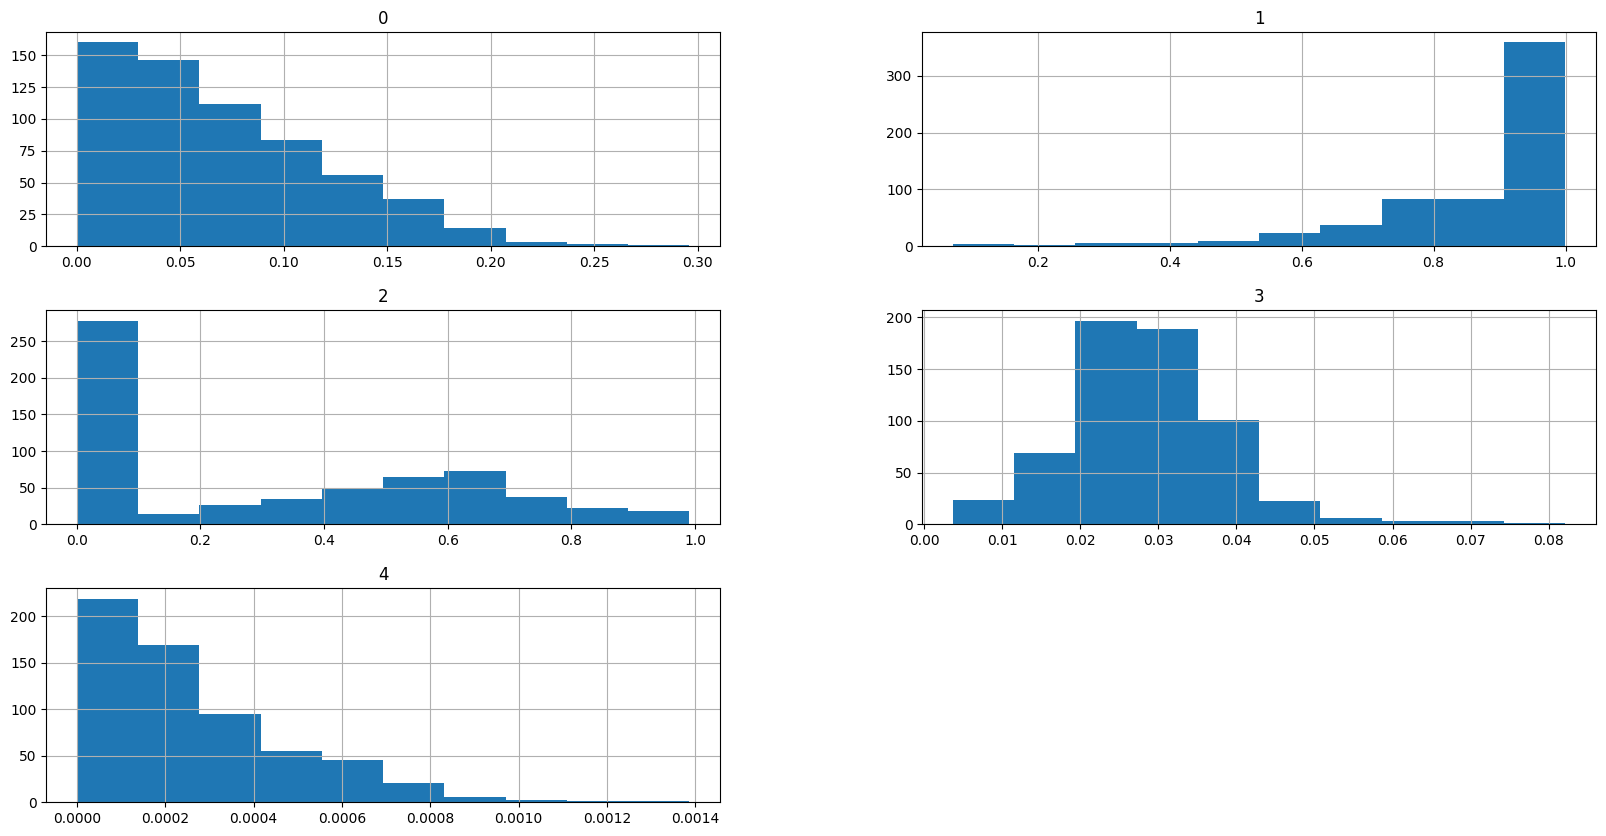

In [69]:
x_norm.hist(figsize = (20,10))
plt.show()

Modeling

<Axes: >

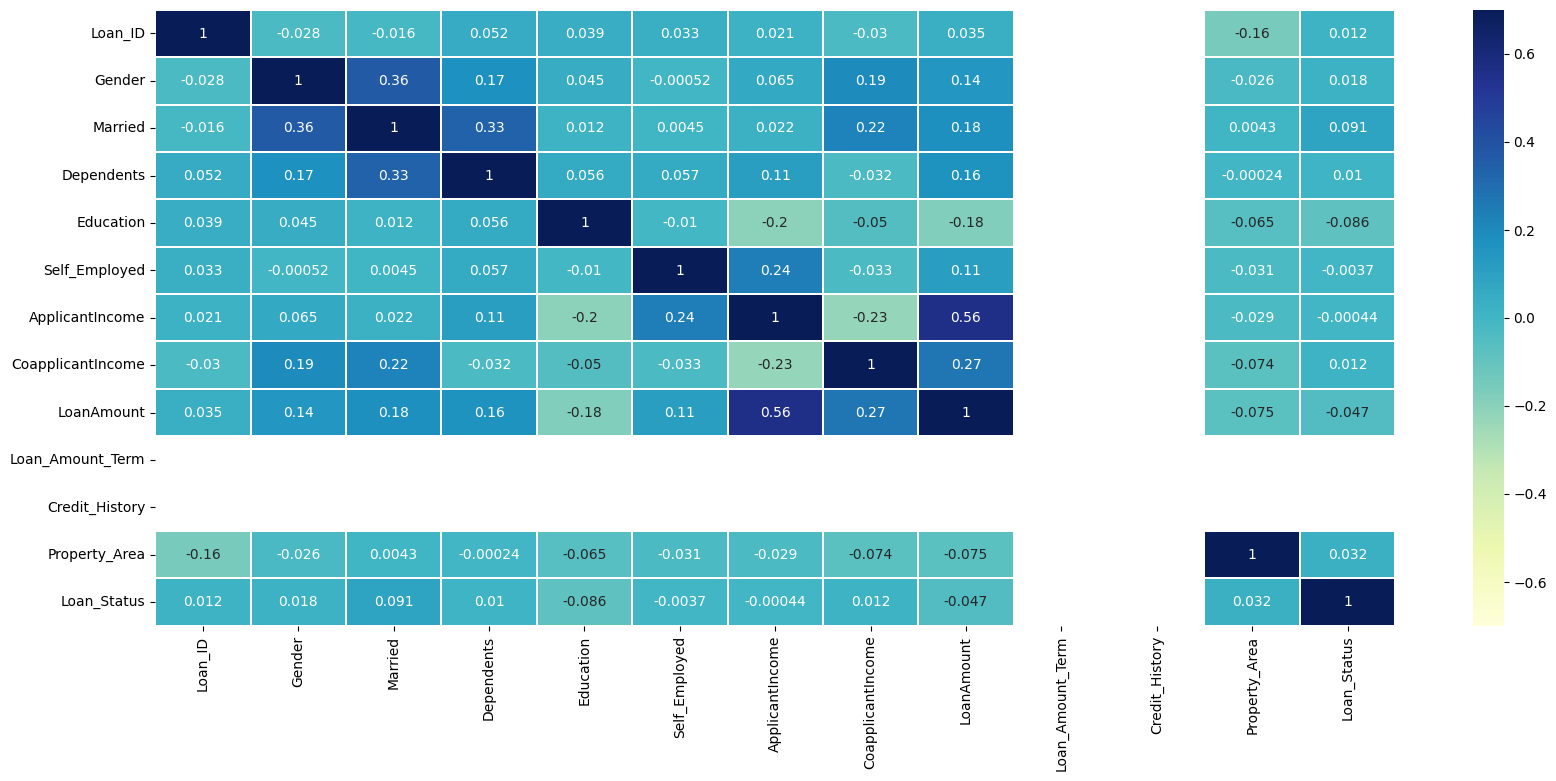

In [70]:
corrmatrix= train_data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-0.7,vmax=0.7,annot=True,linewidths=0.2,cmap='YlGnBu')

In [71]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [72]:
y=train_data['Loan_Status']
X=train_data.drop(['Loan_Status'],axis=True)

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42,test_size=.2)

In [74]:
from sklearn import linear_model
lin_model = linear_model.LinearRegression()

In [75]:
model = lin_model.fit(X_train,y_train)

In [76]:
predict_lin = model.predict(X_test)

In [77]:
predict_lin

array([0.6953397 , 0.73664161, 0.71420064, 0.70330485, 0.6450919 ,
       0.76685789, 0.7489629 , 0.77289367, 0.61795894, 0.74950042,
       0.8078391 , 0.72000303, 0.67379764, 0.66817539, 0.81833937,
       0.79815718, 0.66640624, 0.63141334, 0.72939454, 0.78534552,
       0.73695657, 0.69224439, 0.70336973, 0.69900917, 0.84384416,
       0.63720909, 0.65825651, 0.60090712, 0.66698482, 0.85537391,
       0.78849789, 0.81014288, 0.67686784, 0.68108886, 0.62378885,
       0.58162049, 0.72813905, 0.80069114, 0.75521736, 0.71625589,
       0.61696886, 0.68564539, 0.78431244, 0.76516279, 0.66223199,
       0.65749126, 0.69205359, 0.79381803, 0.7300508 , 0.70098673,
       0.49269224, 0.62778343, 0.6969901 , 0.59667918, 0.70183722,
       0.6364759 , 0.6089058 , 0.67712375, 0.73646328, 0.71613651,
       0.68223956, 0.72415646, 0.79180564, 0.71615699, 0.7777885 ,
       0.65580785, 0.66985813, 0.90230495, 0.80594371, 0.64079428,
       0.61228287, 0.78856264, 0.6989652 , 0.70352759, 0.71749

In [78]:
from sklearn.metrics import mean_squared_error
print('MSE is :',mean_squared_error(y_test,predict_lin))

MSE is : 0.2256868236160998


In [79]:
from sklearn.metrics import r2_score
print('R2 score is:',r2_score(y_test,predict_lin))

R2 score is: 0.007437222532565624


In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.2)

In [81]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [82]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [83]:
y_log_pred=log_reg.predict(X_test)
y_log_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [84]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [85]:
confusion_matrix(y_test,y_log_pred)

array([[ 0, 43],
       [ 0, 80]])

In [86]:
print('Accuracy :',accuracy_score(y_test,y_log_pred))
print('Precision :',precision_score(y_test,y_log_pred))
print('recall :',recall_score(y_test,y_log_pred))
print('F1:',f1_score(y_test,y_log_pred))


Accuracy : 0.6504065040650406
Precision : 0.6504065040650406
recall : 1.0
F1: 0.7881773399014779


In [87]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)

In [88]:
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(X_train,y_train)
  y_pred_knn=classifier.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred_knn)
  metric_k.append(accuracy)

Text(0, 0.5, 'accuracy')

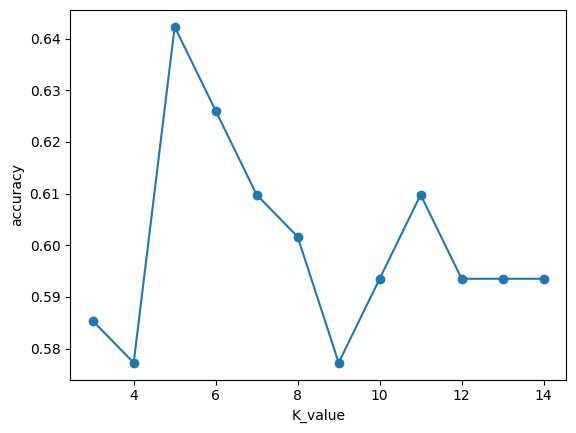

In [89]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K_value')
plt.ylabel('accuracy')

In [90]:
classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
classifier.fit(X_train,y_train)
y_pred_knn=classifier.predict(X_test)

In [91]:
print('Accuracy :',accuracy_score(y_test,y_log_pred))
print('Precision :',precision_score(y_test,y_log_pred))
print('recall :',recall_score(y_test,y_log_pred))
print('F1:',f1_score(y_test,y_log_pred))

Accuracy : 0.6504065040650406
Precision : 0.6504065040650406
recall : 1.0
F1: 0.7881773399014779


SVM model

In [92]:
from sklearn.svm import SVC
sv_cl=SVC(kernel='linear')
sv_cl.fit(X_train,y_train)

SVC(kernel='linear')

In [93]:
y_pred = sv_cl.predict(X_test)

In [94]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('Accuracy is :', accuracy_score(y_test,y_pred))

Accuracy is : 0.6585365853658537


In [95]:
print(confusion_matrix(y_test,y_pred))

[[ 2 41]
 [ 1 79]]


Decision Tree

In [96]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)

In [97]:
print('Accuracy is :',accuracy_score(y_test,y_pred))

Accuracy is : 0.5934959349593496


In [98]:
print(confusion_matrix(y_test,y_pred))

[[17 26]
 [24 56]]


Random Forest

In [99]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)

In [100]:
print('Accuracy is :',accuracy_score(y_test,y_pred))

Accuracy is : 0.6422764227642277


In [101]:
print(confusion_matrix(y_test,y_pred))

[[ 2 41]
 [ 3 77]]


Hyper Parameter Tuning

In [102]:
rf_clf1=RandomForestClassifier(n_estimators=20, max_depth=20, criterion='entropy',min_samples_split=3)
rf_clf1.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=3,
                       n_estimators=20)

In [103]:
y_pred = rf_clf1.predict(X_test)

In [104]:
print('Accuracy is :',accuracy_score(y_test,y_pred))

Accuracy is : 0.6178861788617886


Load Test file

In [105]:
test_data=pd.read_csv('/content/test_lAUu6dG.csv')

In [106]:
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [107]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [108]:
test_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>],
       [<Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Loan_Amount_Term'}>],
       [<Axes: title={'center': 'Credit_History'}>, <Axes: >]],
      dtype=object)

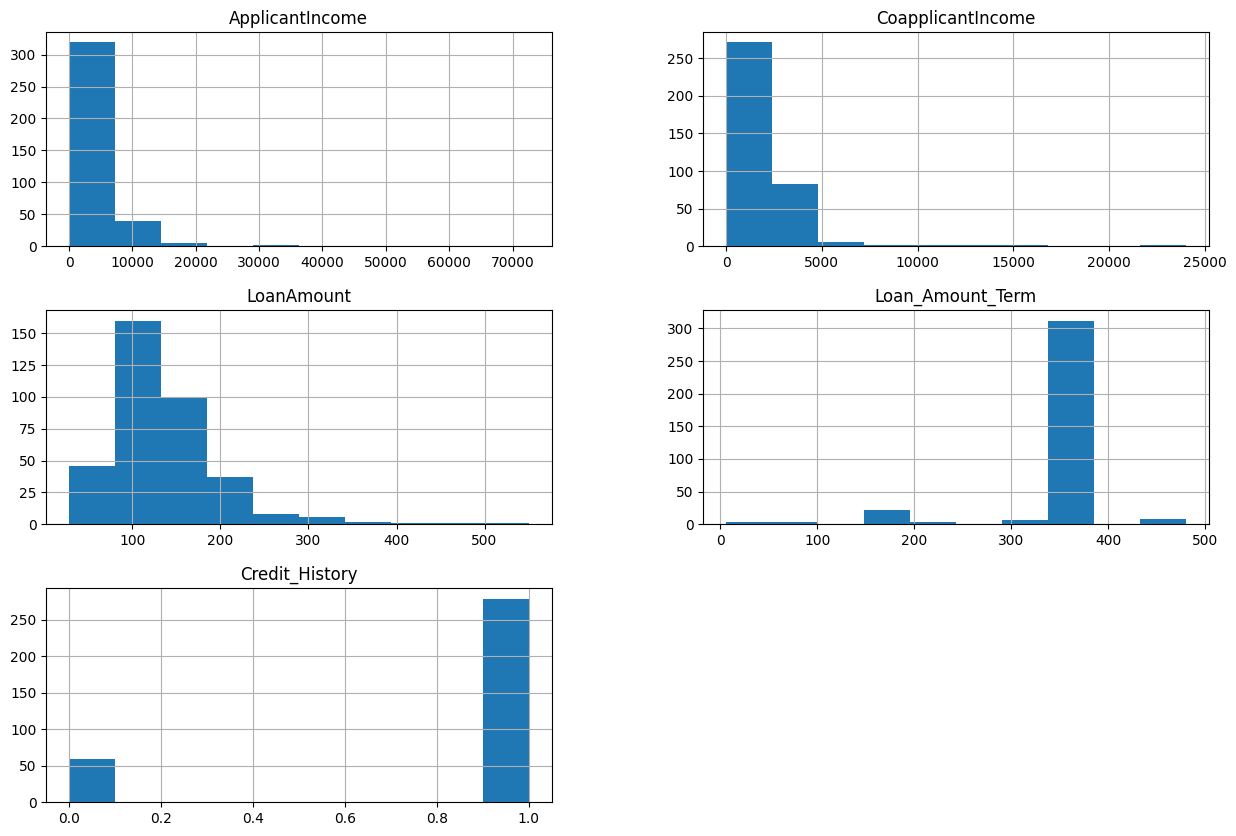

In [109]:
freqgraph = test_data.select_dtypes(['float64','int64'])
freqgraph.hist(figsize=(15,10))

In [110]:
test_data['Gender'] = test_data['Gender'].fillna(test_data['Gender'].mode()[0])
test_data['Dependents'] = test_data['Dependents'].fillna(test_data['Dependents'].mode()[0])
test_data['Self_Employed'] = test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0])
test_data['LoanAmount'] =test_data['LoanAmount'].fillna(test_data['LoanAmount'].median())
test_data['Loan_Amount_Term'] = test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].median())
test_data['Credit_History'] = test_data['Credit_History'].fillna(test_data['Credit_History'].median())

In [111]:
test_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

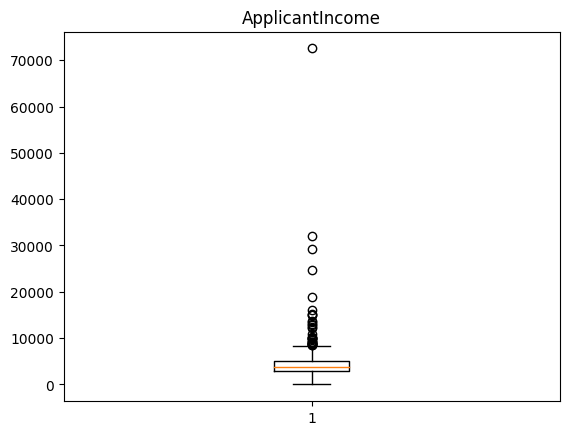

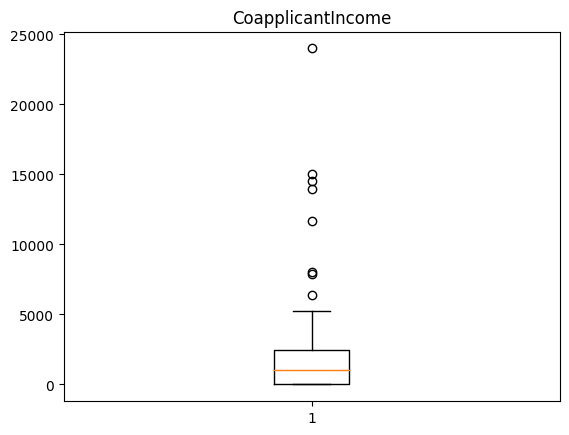

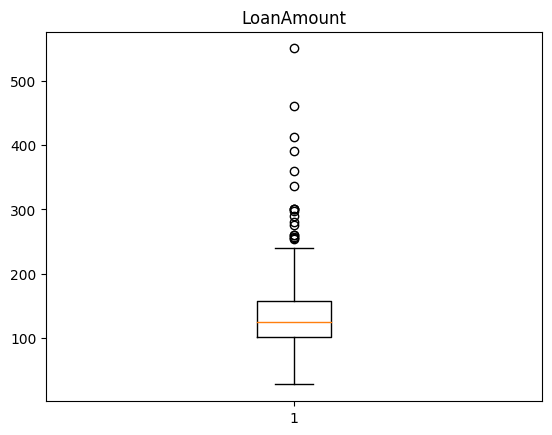

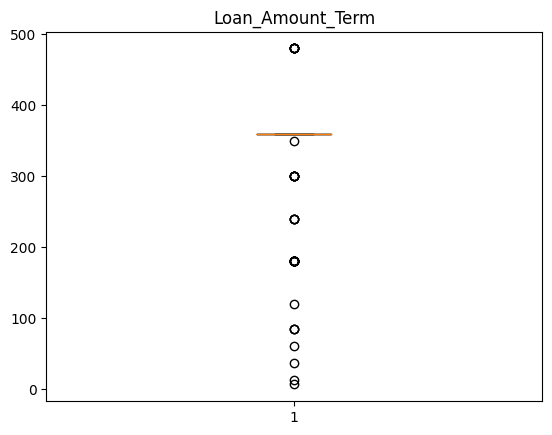

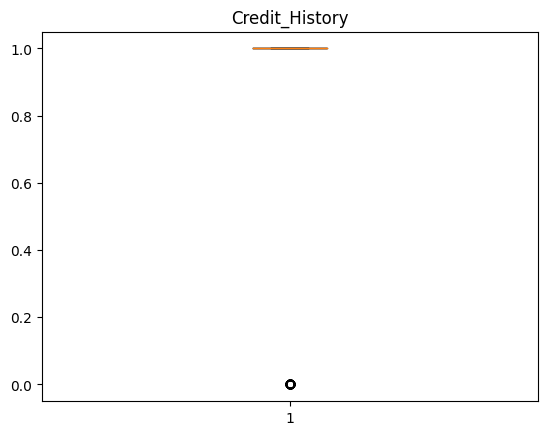

In [112]:
numerical_col = [ 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

for i in numerical_col:
  plt.figure()
  plt.boxplot(test_data[i])
  plt.title(i)
  plt.show()

In [113]:
# colunm -'ApplicantIncome'
Q1 = test_data['ApplicantIncome'].quantile(0.25)
Q2 = test_data['ApplicantIncome'].quantile(0.50)
Q3 = test_data['ApplicantIncome'].quantile(0.75)

print("Q1 is: ",Q1)
print("Q2 is: ",Q2)
print("Q2 is: ",Q2)

IQR = Q3-Q1

print(IQR)
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR

print("lower whisker: ",lower_lim)
print("upper whisker: ",upper_lim)

outlier =[]
for x in test_data['ApplicantIncome']:
  if((x<lower_lim) or (x>upper_lim)):
    outlier.append(x)

print(outlier)

Q1 is:  2864.0
Q2 is:  3786.0
Q2 is:  3786.0
2196.0
lower whisker:  -430.0
upper whisker:  8354.0
[13633, 12173, 9226, 72529, 8449, 13518, 9719, 12500, 32000, 10890, 12941, 8703, 15312, 10166, 9167, 13083, 10000, 8706, 14911, 10000, 18840, 24797, 29167, 9000, 10000, 8750, 14987, 16000, 9699, 8667, 8550, 9200]


In [114]:
test_data['ApplicantIncome'] = test_data['ApplicantIncome'].clip(lower=lower_lim, upper=upper_lim)

In [115]:
outlier =[]
for x in test_data['ApplicantIncome']:
  if((x<lower_lim) or (x>upper_lim)):
    outlier.append(x)

print(outlier)

[]


In [116]:
# colunm -'CoapplicantIncome'
Q1 = test_data['CoapplicantIncome'].quantile(0.25)
Q2 = test_data['CoapplicantIncome'].quantile(0.50)
Q3 = test_data['CoapplicantIncome'].quantile(0.75)

print("Q1 is: ",Q1)
print("Q2 is: ",Q2)
print("Q2 is: ",Q2)

IQR = Q3-Q1

print(IQR)
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR

print("lower whisker: ",lower_lim)
print("upper whisker: ",upper_lim)

outlier =[]
for x in test_data['CoapplicantIncome']:
  if((x<lower_lim) or (x>upper_lim)):
    outlier.append(x)

print(outlier)

Q1 is:  0.0
Q2 is:  1025.0
Q2 is:  1025.0
2430.5
lower whisker:  -3645.75
upper whisker:  6076.25
[7916, 24000, 8000, 6414, 14507, 13983, 11666, 15000]


In [117]:
test_data['CoapplicantIncome'] = test_data['CoapplicantIncome'].clip(lower=lower_lim, upper=upper_lim)

In [118]:
outlier =[]
for x in test_data['CoapplicantIncome']:
  if((x<lower_lim) or (x>upper_lim)):
    outlier.append(x)

print(outlier)

[]


Label Encoding

In [119]:
from sklearn.preprocessing import LabelEncoder

In [120]:
obj_data = test_data.select_dtypes(include = 'object')
le = LabelEncoder()
for i in obj_data:
    test_data[i] = le.fit_transform(test_data[i])

In [121]:
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,5720,0.0,110.0,360.0,1.0,2
1,1,1,1,1,0,0,3076,1500.0,126.0,360.0,1.0,2
2,2,1,1,2,0,0,5000,1800.0,208.0,360.0,1.0,2
3,3,1,1,2,0,0,2340,2546.0,100.0,360.0,1.0,2
4,4,1,0,0,1,0,3276,0.0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,362,1,1,3,1,1,4009,1777.0,113.0,360.0,1.0,2
363,363,1,1,0,0,0,4158,709.0,115.0,360.0,1.0,2
364,364,1,0,0,0,0,3250,1993.0,126.0,360.0,1.0,1
365,365,1,1,0,0,0,5000,2393.0,158.0,360.0,1.0,0


In [122]:
#test_data.set_index('Loan_ID',inplace=True)

Make Prediction

In [123]:
predictions =log_reg.predict(test_data)

In [124]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [125]:
test_data['Loan_Status']=predictions

In [126]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,1,0,0,0,5720,0.0,110.0,360.0,1.0,2,1
1,1,1,1,1,0,0,3076,1500.0,126.0,360.0,1.0,2,1
2,2,1,1,2,0,0,5000,1800.0,208.0,360.0,1.0,2,1
3,3,1,1,2,0,0,2340,2546.0,100.0,360.0,1.0,2,1
4,4,1,0,0,1,0,3276,0.0,78.0,360.0,1.0,2,1


In [127]:
test_data.to_csv("sample_submission_49d68Cx.csv", index=False)